In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality-2024/Cairo_Air_Quality.csv
/kaggle/input/air-quality-2024/Air_Quality.csv
/kaggle/input/air-quality-2024/London_Air_Quality.csv
/kaggle/input/air-quality-2024/New_York_Air_Quality.csv
/kaggle/input/air-quality-2024/Dubai_Air_Quality.csv
/kaggle/input/air-quality-2024/Sydney_Air_Quality.csv
/kaggle/input/air-quality-2024/Brasilia_Air_Quality.csv


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [44]:
df=pd.read_csv("/kaggle/input/air-quality-2024/London_Air_Quality.csv")

In [45]:
df.shape

(8784, 9)

In [46]:
df.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,162.0,NaN,4.7,1.0,65.0,3.5,7.3,9.070833
1,2024-01-01 01:00:00+00:00,163.0,NaN,4.6,1.2,63.0,3.5,6.0,25.200000
2,2024-01-01 02:00:00+00:00,157.0,NaN,4.3,1.1,64.0,3.3,5.9,25.599998
3,2024-01-01 03:00:00+00:00,156.0,NaN,4.4,1.1,64.0,3.1,5.7,25.599998
4,2024-01-01 04:00:00+00:00,157.0,NaN,4.6,1.1,65.0,2.9,5.7,26.000000


In [47]:
df.tail(3)

,Date,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
8781,2024-12-31 21:00:00+00:00,144.0,449.0,10.8,1.5,64.0,5.7,9.6,25.599998
8782,2024-12-31 22:00:00+00:00,142.0,448.0,9.2,1.4,65.0,4.6,9.6,26.000000
8783,2024-12-31 23:00:00+00:00,139.0,445.0,8.1,1.2,69.0,4.0,8.9,27.600000


In [48]:
df=df.drop(columns=['Date'])

In [49]:
df.columns

Index(['CO', 'CO2', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI'], dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO      8784 non-null   float64
 1   CO2     1608 non-null   float64
 2   NO2     8784 non-null   float64
 3   SO2     8784 non-null   float64
 4   O3      8784 non-null   float64
 5   PM2.5   8784 non-null   float64
 6   PM10    8784 non-null   float64
 7   AQI     8784 non-null   float64
dtypes: float64(8)
memory usage: 549.1 KB


In [51]:
df.describe()

,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
count,8784.000000,1608.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,187.744194,475.114428,21.797495,3.326093,49.154030,9.985178,14.136009,27.097212
std,49.121408,44.233857,15.321360,3.121396,23.235001,6.763177,7.891899,9.971780
min,105.000000,435.000000,1.800000,0.300000,0.000000,0.800000,1.200000,9.070833
25%,156.000000,450.000000,10.500000,1.400000,36.000000,5.300000,8.700000,20.800000
50%,177.000000,458.000000,16.900000,2.300000,51.000000,7.800000,11.900000,25.200000
75%,205.000000,482.000000,28.800000,4.000000,64.000000,12.500000,17.100000,30.341665
max,536.000000,786.000000,87.400000,41.300000,142.000000,45.100000,55.100000,70.370010


In [52]:
df.isnull().sum()

CO          0
CO2      7176
NO2         0
SO2         0
O3          0
PM2.5       0
PM10        0
AQI         0
dtype: int64

In [53]:
num_imputer=SimpleImputer(strategy='median')
df[['CO2']]=num_imputer.fit_transform(df[['CO2']])

In [54]:
print("         CO2\n",df["CO2"])

         CO2
 0       458.0
1       458.0
2       458.0
3       458.0
4       458.0
        ...  
8779    449.0
8780    449.0
8781    449.0
8782    448.0
8783    445.0
Name: CO2, Length: 8784, dtype: float64


In [55]:
df["CO2"].isnull().sum()

0

In [56]:
df.isnull().sum()

CO       0
CO2      0
NO2      0
SO2      0
O3       0
PM2.5    0
PM10     0
AQI      0
dtype: int64

In [57]:
x=df.drop(columns=['AQI'])
y=df['AQI']

In [58]:
x

,CO,CO2,NO2,SO2,O3,PM2.5,PM10
0,162.0,458.0,4.7,1.0,65.0,3.5,7.3
1,163.0,458.0,4.6,1.2,63.0,3.5,6.0
2,157.0,458.0,4.3,1.1,64.0,3.3,5.9
3,156.0,458.0,4.4,1.1,64.0,3.1,5.7
4,157.0,458.0,4.6,1.1,65.0,2.9,5.7
...,...,...,...,...,...,...,...
8779,149.0,449.0,13.8,1.5,59.0,6.3,9.7
8780,147.0,449.0,11.8,1.6,62.0,5.8,9.6
8781,144.0,449.0,10.8,1.5,64.0,5.7,9.6
8782,142.0,448.0,9.2,1.4,65.0,4.6,9.6


In [59]:
y

0        9.070833
1       25.200000
2       25.599998
3       25.599998
4       26.000000
          ...    
8779    23.600002
8780    24.800000
8781    25.599998
8782    26.000000
8783    27.600000
Name: AQI, Length: 8784, dtype: float64

In [60]:
scaler=StandardScaler()

In [61]:
x_scaled=scaler.fit_transform(x)

In [62]:
x_scaled.shape

(8784, 7)

In [63]:
x_scaled

array([[-0.524123  , -0.1563045 , -1.115989  , ...,  0.68202589,
        -0.95894973, -0.86625515],
       [-0.50376412, -0.1563045 , -1.1225162 , ...,  0.59594395,
        -0.95894973, -1.03099042],
       [-0.62591741, -0.1563045 , -1.14209783, ...,  0.63898492,
        -0.98852331, -1.04366236],
       ...,
       [-0.89058287, -0.60531643, -0.71782934, ...,  0.63898492,
        -0.6336403 , -0.57480045],
       [-0.93130063, -0.65520664, -0.82226466, ...,  0.68202589,
        -0.79629501, -0.57480045],
       [-0.99237728, -0.80487728, -0.89406394, ...,  0.85418976,
        -0.88501577, -0.66350406]])

In [64]:
x_scaled.min()

-2.115637036051557

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

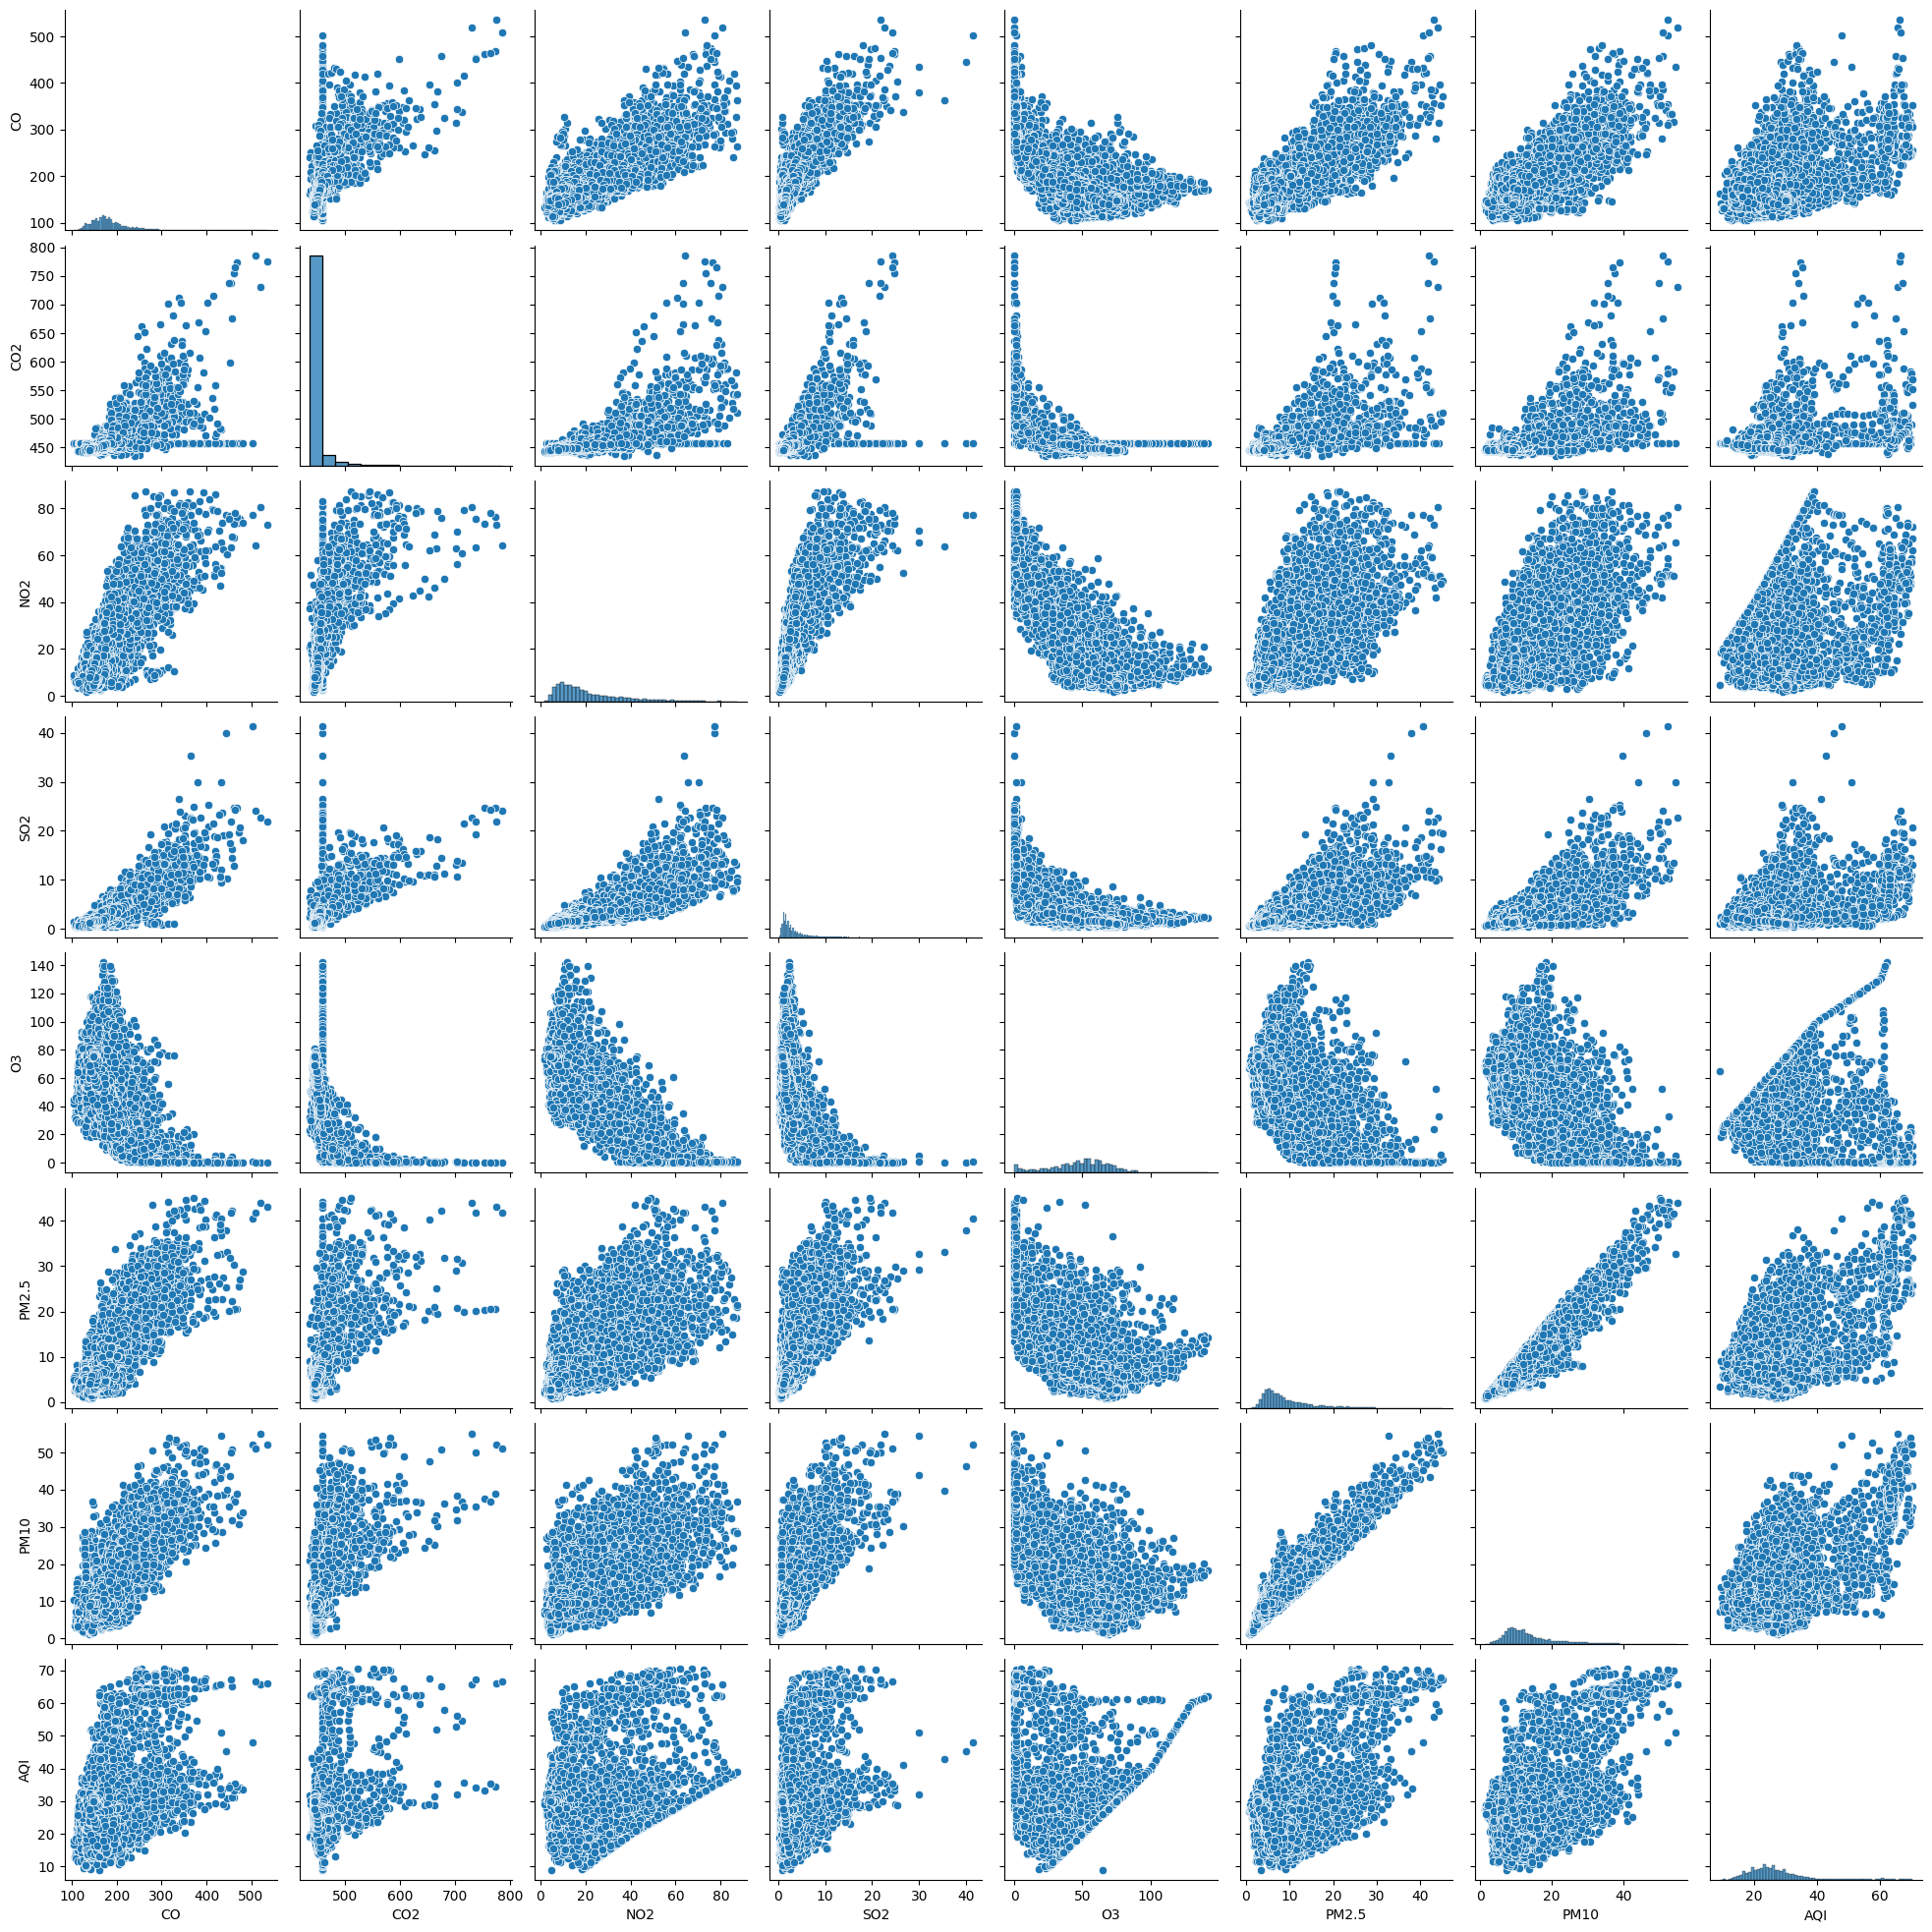

In [88]:
sns.pairplot(df)
plt.show()


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,
                                               random_state=42,train_size=.8)

In [ ]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
x_train_scaled

x_test_scaled

In [89]:
Linear_Model=LinearRegression()
Random_Model=RandomForestRegressor(n_estimators=100,
 max_depth=6,random_state=42)
Tree_Model=DecisionTreeRegressor(max_depth=6,random_state=42)
SVR_Model=SVR(kernel='linear',epsilon=.1,gamma='scale')
XGB_Model=XGBRegressor(n_estomators=100,max_depth=6,
                       learning_rate=.05,random_state=42)
knn=model = KNeighborsRegressor(
    n_neighbors=5,       # 👑 The 'k' in KNN
    weights='uniform',   # or 'distance'
    algorithm='auto',    # search algo: 'ball_tree', 'kd_tree', 'brute'
    leaf_size=30,        # for trees
    p=2,                 # distance metric: 1=Manhattan, 2=Euclidean
    metric='minkowski'   # distance formula
)

In [103]:
Linear_Model.fit(x_train,y_train)
lt=Linear_Model.score(x_train_scaled,y_train)
ls=Linear_Model.score(x_test_scaled,y_test)

In [91]:
Random_Model.fit(x_train_scaled,y_train)
rm

RandomForestRegressor(max_depth=6, random_state=42)

In [92]:
XGB_Model.fit(x_train_scaled,y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [08:37:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estomators" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_estomators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
Tree_Model.fit(x_train_scaled,y_train)

In [93]:
SVR_Model.fit(x_train_scaled,y_train)

SVR(kernel='linear')

In [99]:
knn.fit(x_train_scaled,y_train)

KNeighborsRegressor()

In [ ]:
def Evaluate_model(model,x_test,y_test):
    y_pred=model.predict(x_test)
    mse=mean_squared_error(y_pred,y_test)
    mae=mean_absolute_error(y_pred,y_test)
    r2=r2_score(y_pred,y_test)
    print(f"\n Mean Squared Error : {round(mse,2)}")
    print(f"\n Mean Absolute Error : {round(mae,2)}")
    print(f"\n R square error or R2 score  : {round(r2,2)}")



**Linear_Regression Evaluation**

In [96]:
Evaluate_model(Linear_Model,x_test,y_test)


 Mean Squared Error : 52.74

 Mean Absolute Error : 4.83

 R square error or R2 score  : -0.05


**Random_Forest Evaluation** 

In [80]:
Evaluate_model(Random_Model,x_test,y_test)


 Mean Squared Error : 34.56

 Mean Absolute Error : 3.25

 R square error or R2 score  : 0.43


**Decision_Tree Evaluation**

                        

In [81]:
Evaluate_model(Tree_Model,x_test,y_test)


 Mean Squared Error : 40.23

 Mean Absolute Error : 3.56

 R square error or R2 score  : 0.42


**SVM Evauation**

In [86]:
Evaluate_model(SVR_Model,x_test,y_test)


 Mean Squared Error : 60.45

 Mean Absolute Error : 4.54

 R square error or R2 score  : -0.44


**XGB_Evaluation**

In [87]:
Evaluate_model(XGB_Model,x_test,y_test)


 Mean Squared Error : 29.23

 Mean Absolute Error : 2.92

 R square error or R2 score  : 0.55


**KNN Neighbour Evaluation**

In [100]:
Evaluate_model(knn,x_test,y_test)


 Mean Squared Error : 31.58

 Mean Absolute Error : 2.99

 R square error or R2 score  : 0.57


In [106]:
models = {
    'Linear': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVM': SVR()
} 


In [107]:
def model_scores(models, x_train, x_test, y_train, y_test):
    train_scores = []
    test_scores = []

    for name, model in models.items():
        model.fit(x_train, y_train)
        train_scores.append(model.score(x_train, y_train))
        test_scores.append(model.score(x_test, y_test))

    return train_scores, test_scores

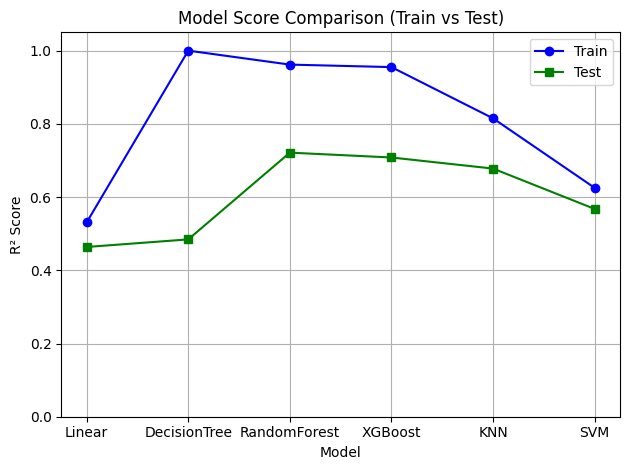

In [109]:
train_scores, test_scores = model_scores(models, x_train, x_test, y_train, y_test)
import matplotlib.pyplot as plt

model_names = list(models.keys())

plt.plot(model_names, train_scores, label='Train', marker='o', color='blue')
plt.plot(model_names, test_scores, label='Test', marker='s', color='green')

plt.title('Model Score Comparison (Train vs Test)')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()